In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [19]:
dataA = pd.read_csv("RDW.csv").drop(columns=["ID"])      
dataB = pd.read_csv("JS.csv").drop(columns=["ID"]) 

# print(dataA.head())
# print(dataB.head())

In [20]:
results = []

In [21]:
for col in dataA.columns:  
    groupA = dataA[col]
    groupB = dataB[col]
    
    # Mann-Whitney U test
    U, p = mannwhitneyu(groupA, groupB, alternative='two-sided')
    
    # Calculer Z value
    n1 = len(groupA)
    n2 = len(groupB)
    mean_U = n1 * n2 / 2
    std_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    Z = (U - mean_U) / std_U
    
    # Effect size r
    r = Z / np.sqrt(n1 + n2)
    
    # Enregistrer les résultats
    results.append({
        "Question": col,
        "U": U,
        "p-value": p,
        "Median_A": groupA.median(),
        "IQR_A": groupA.quantile(0.75) - groupA.quantile(0.25),
        "Median_B": groupB.median(),
        "IQR_B": groupB.quantile(0.75) - groupB.quantile(0.25),
        "r": r
    })


In [22]:
results_df = pd.DataFrame(results)
results_df["r"] = results_df["r"].round(3)  

print(results_df)

             Question     U   p-value  Median_A  IQR_A  Median_B  IQR_B      r
0       CTRL_Gestures   7.5  0.287726       4.0    2.0       4.0    0.0 -0.330
1           CTRL_Move   8.5  0.402784       4.0    1.0       4.0    0.0 -0.264
2     CTRL_Effortless  14.0  0.822456       4.0    0.0       4.0    1.0  0.099
3       CTRL_Coherent  10.0  0.653594       4.0    0.0       4.0    2.0 -0.165
4   CTRL_Natural_Walk   3.5  0.062567       3.0    1.0       4.0    0.0 -0.595
5          PRE_Events  11.5  0.912771       5.0    2.0       5.0    2.0 -0.066
6        PRE_Reactive   8.5  0.406483       6.0    0.0       6.0    1.0 -0.264
7          PRE_Engage  14.5  0.733730       6.0    0.0       6.0    1.0  0.132
8         PRE_Natural   5.0  0.131379       3.0    1.0       4.0    1.0 -0.495
9       PRE_Realistic  14.0  0.826581       6.0    2.0       5.0    1.0  0.099
10        PRE_Predict   5.0  0.136333       4.0    3.0       6.0    2.0 -0.495
11        PRE_Explore   7.0  0.278076       5.0    1

In [23]:
def v_boxplot(data_rdw, data_js, cols, fig_title="Boxplot", figsize=(20,6), rot=90, width=0.9):
    
    n = len(cols)
    
    # Chaque question comprend 2 positions: RDW et JS
    positions = []
    for i in range(n):
        positions.append(i*3 + 1)  # RDW
        positions.append(i*3 + 2)  # JS

    # Données pour boxplot
    all_data = []
    for col in cols:
        all_data.append(data_rdw[col].dropna().values)
        all_data.append(data_js[col].dropna().values)


    plt.figure(figsize=figsize)
    bplots = plt.boxplot(all_data, positions=positions, widths=width, patch_artist=True)
    
    # Coloration des boxplots
    colors = ['skyblue', 'salmon'] * n  # RDW=skyblue, JS=salmon
    for patch, color in zip(bplots['boxes'], colors):
        patch.set_facecolor(color)
    plt.legend([bplots["boxes"][0], bplots["boxes"][1]], ['RDW', 'Joystick'], loc='upper right')
    
    plt.xticks([i*3 + 1.5 for i in range(n)], cols, rotation=rot)
    plt.ylabel("Score")
    plt.title(fig_title)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

In [24]:
# Separer les colonnes PRE et les autres
pre_cols = [
    "PRE_Events",
    "PRE_Reactive",
    "PRE_Engage",
    "PRE_Natural",
    "PRE_Realistic",
    "PRE_Predict",
    "PRE_Explore",
    "PRE_Delay"
]

other_cols = [col for col in dataA.columns if col not in pre_cols]

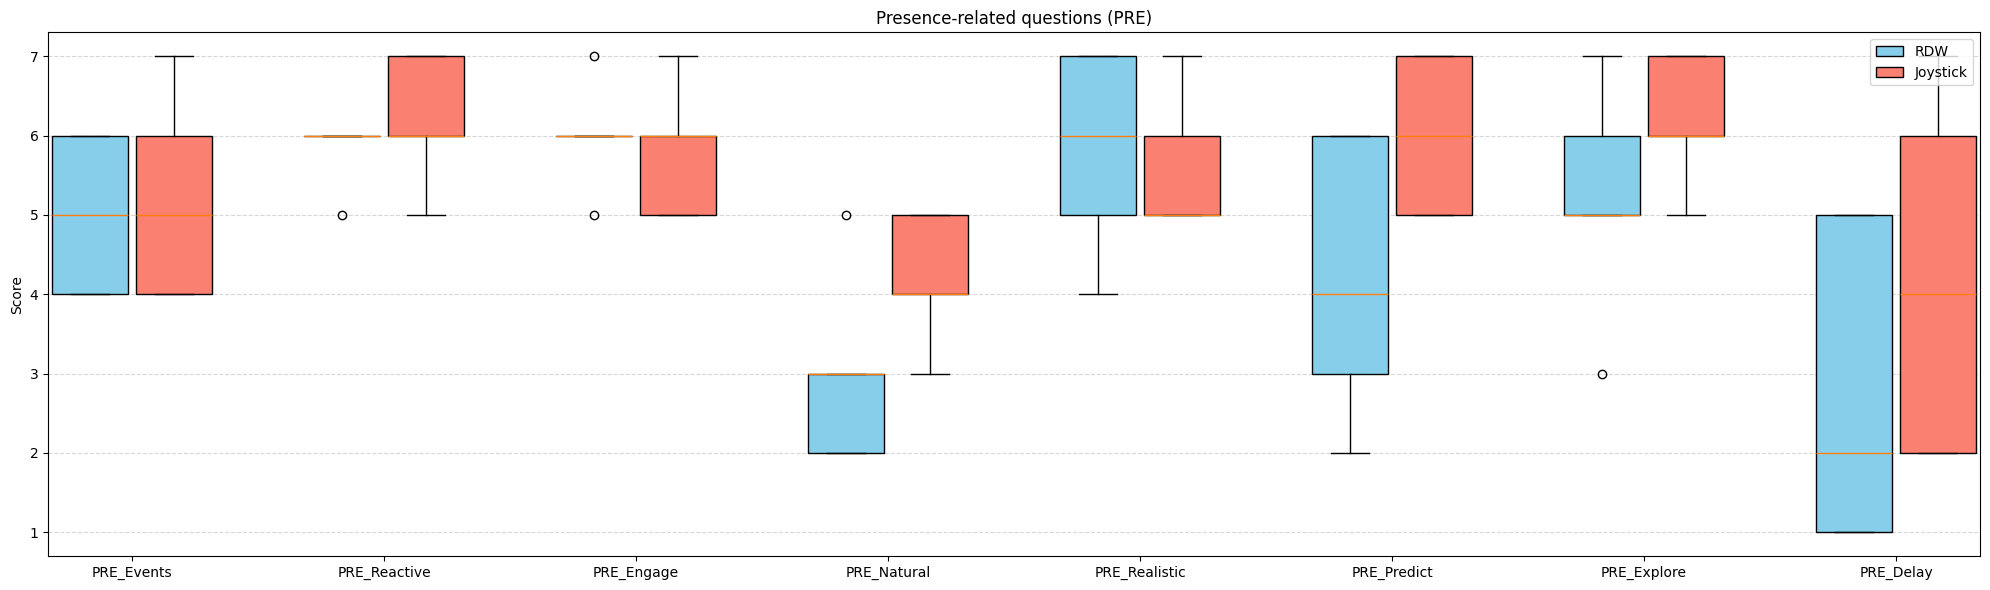

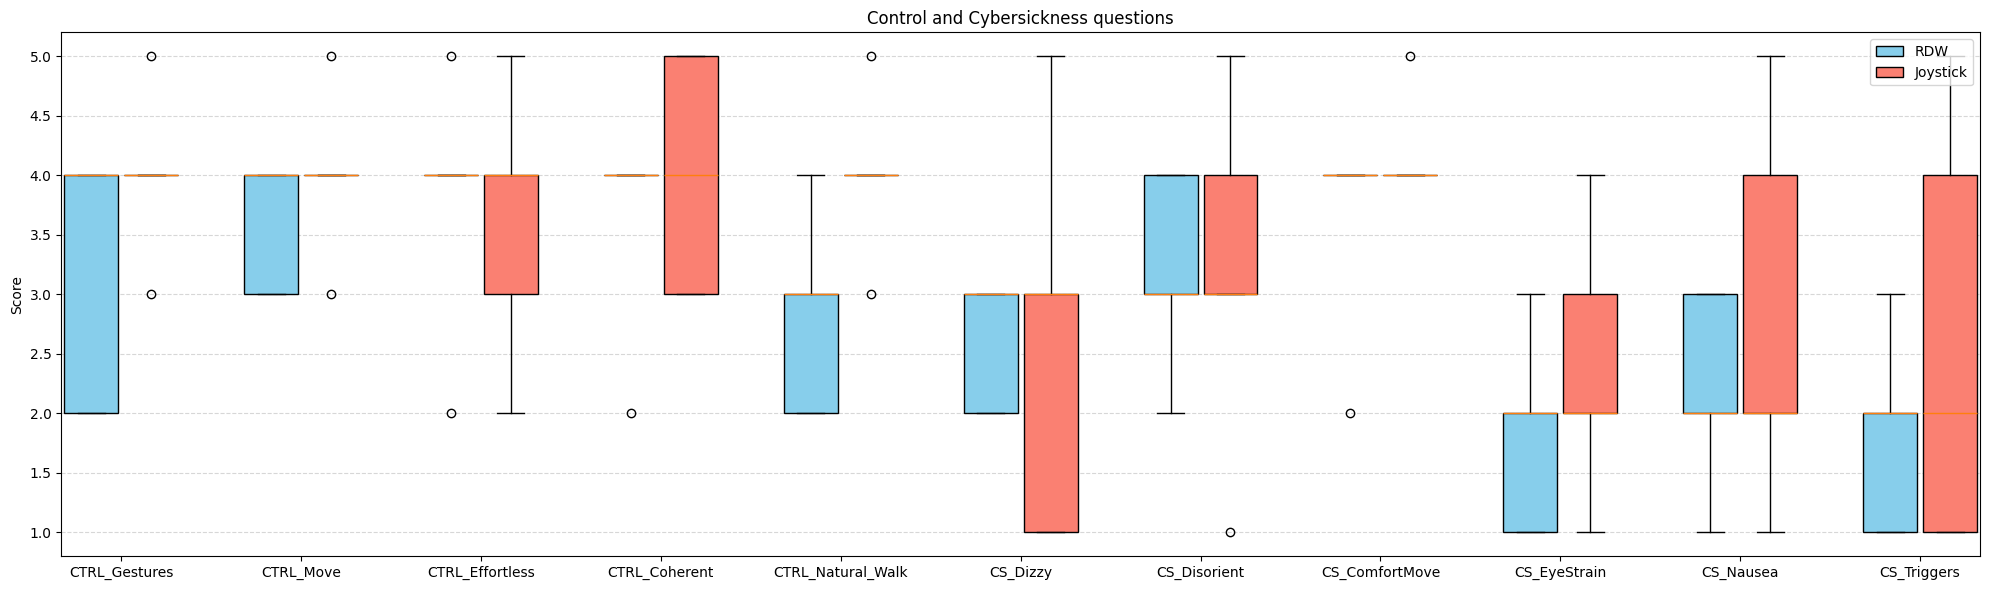

In [25]:
# Image 1: Questions liées à la présence (PRE)
v_boxplot(
    dataA,
    dataB,
    pre_cols,
    fig_title="Presence-related questions (PRE)",
    rot=0
)

# Image 2: Questions de contrôle et de cybersickness
v_boxplot(
    dataA,
    dataB,
    other_cols,
    fig_title="Control and Cybersickness questions",
    rot=0
)

In [26]:
sus = pd.read_csv("SUS.csv") 

sus_dataA = sus[sus["ID"].str.startswith("A")].drop(columns=["ID"])
sus_dataB = sus[sus["ID"].str.startswith("B")].drop(columns=["ID"])

# print("RDW:\n", sus_dataA)
# print("JS:\n", sus_dataB)

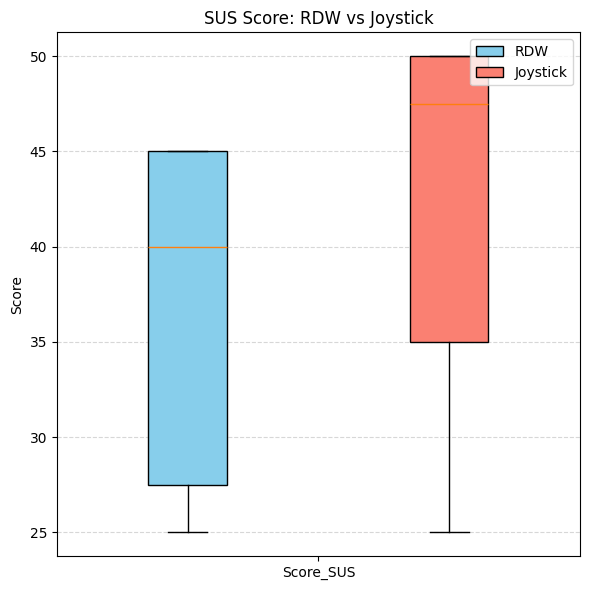

In [30]:
v_boxplot(
    sus_dataA,
    sus_dataB,
    cols=["Score_SUS"], 
    fig_title="SUS Score: RDW vs Joystick",
    figsize=(6,6),
    rot=0,
    width=0.3
)